*Md. Neyamul Islam Shibbir*<br>
**2017331047**

**Import Libraries**

In [ ]:
from scipy.io import wavfile
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt

**Read The Audio (From the HB.wav File)**


Sampling Frequency
44100


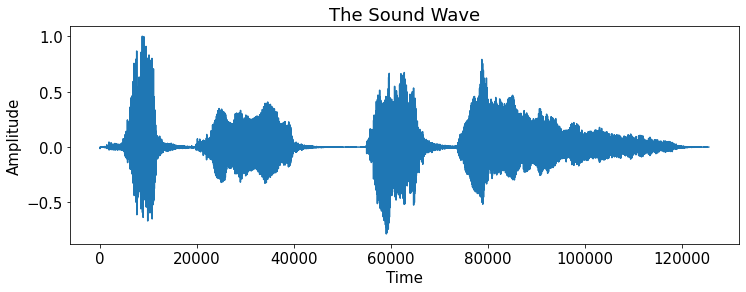

In [ ]:
Fs, wav= wavfile.read("HB.wav") #Fs is the sampling frequency , and Wav is the spectrum
wav=wav*1
print("Sampling Frequency")
print(Fs) # sampling frequency
plt.title("The Sound Wave")
plt.plot(wav)
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplots_adjust(hspace=.5)
plt.rc('font', size=15)
fig = plt.gcf()
fig.set_size_inches(12, 4)

**Listen** The Clean Audio.

In [ ]:
print("Listen the Clean Audio from Here")
Audio("HB.wav") 

Listen the Clean Audio from Here


**Lets** Add some noise to the clean Audio Wave

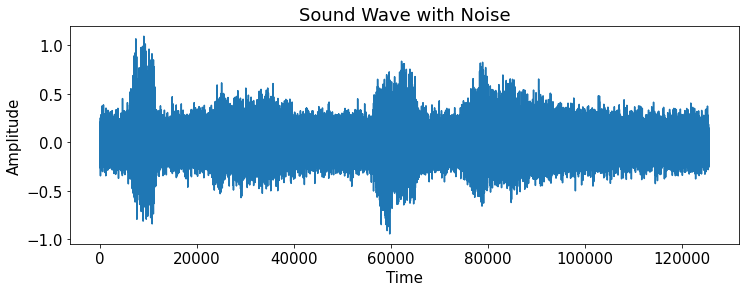

In [ ]:
noise = np.random.normal(0, 0.11, np.size(wav))
noisy_wav=wav+noise
plt.title("Sound Wave with Noise")
plt.plot(noisy_wav)
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplots_adjust(hspace=.5)
plt.rc('font', size=15)
fig = plt.gcf()
fig.set_size_inches(12, 4)

In [ ]:
wavfile.write('noisy_sound.wav', Fs, noisy_wav)

**Listen** The Audio/Sound with Noise.

In [ ]:
print("Listen the Noisy Audio from Here")
Audio(noisy_wav, rate=Fs)

Listen the Noisy Audio from Here


# **Noice Cancellation**

**1. Spectral Analysis**

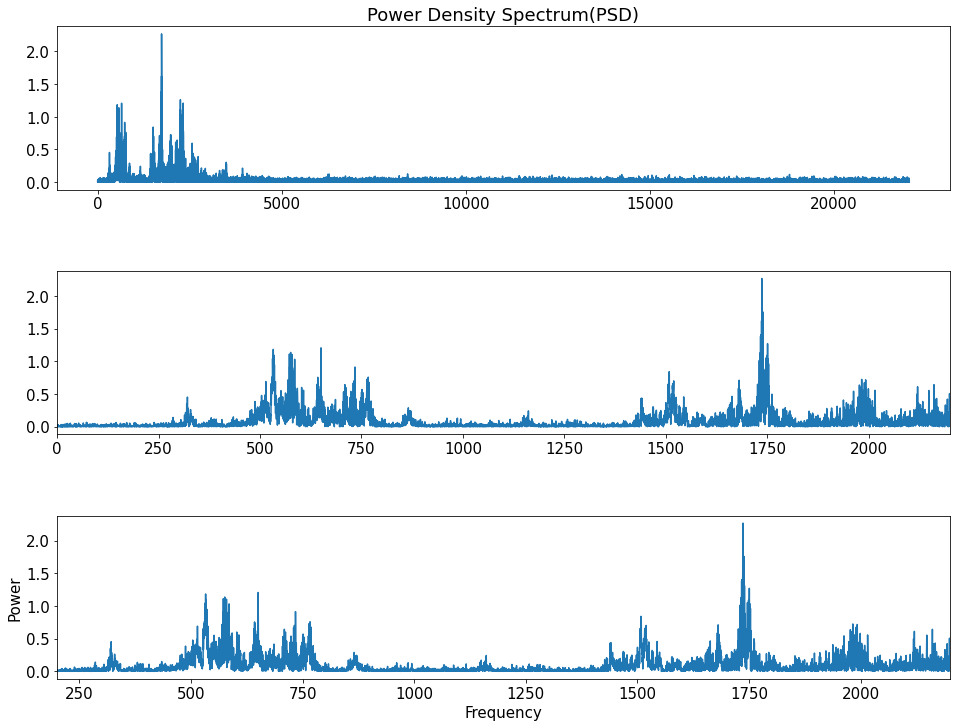

In [ ]:
#Noise Cancellation
import scipy as sp

#Spectral Analysis
N=np.size(noisy_wav)
X_freq = abs(np.fft.fft(noisy_wav,N))
PSD = X_freq*np.conjugate(X_freq)/N
dt= 1/Fs
freq = (1/(dt*N))* np.arange(N)
L = np.arange(1, np.floor(N/2), dtype='int')
plt.subplot(3,1,1)
plt.plot(freq[L],PSD[L])
plt.title("Power Density Spectrum(PSD)")
plt.subplot(3,1,2)
plt.plot(freq[L],PSD[L])
plt.xlim(0,2200)
plt.subplot(3,1,3)
plt.plot(freq[L],PSD[L])
plt.xlim(200,2200)
plt.xlabel("Frequency")
plt.ylabel("Power")




fa = (Fs/2)*np.arange(0,1.5,2/N)    #followed nquist sampling therom
X_magnitude = (2/N) * abs(noisy_wav[0:np.size(fa)])

plt.subplots_adjust(hspace=.5)
plt.rc('font', size=15)
fig = plt.gcf()
fig.set_size_inches(16, 12)


**Create Bandpass Filter**<br>
With frequency range 200 to 2200 that was found appropiate on that PSD figure.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


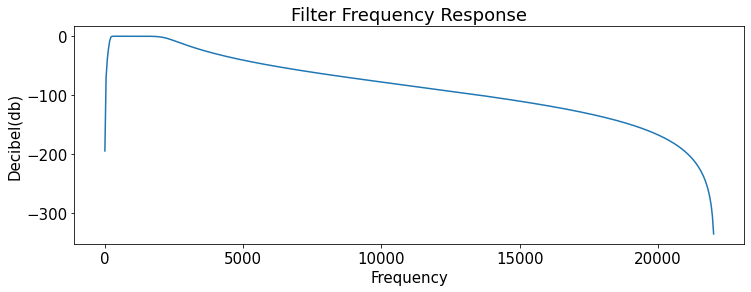

In [ ]:
#Create a Bandpass Filter
from scipy import signal
o= 5
fc = np.array([200, 2200])
wc= 2*fc/Fs
[b,a]= signal.butter(o,wc, btype = 'bandpass')
k=int(Fs/2)
[W,h] = signal.freqz(b,a)
W= Fs*W/(2*np.pi)
plt.title("Filter Frequency Response")
plt.plot(W, 20*np.log10(h))
plt.ylabel("Decibel(db)")
plt.xlabel("Frequency")


plt.subplots_adjust(hspace=.5)
plt.rc('font', size=15)
fig = plt.gcf()
fig.set_size_inches(12, 4)


# **The Reducing Sound Wave Noise Function**

In [ ]:
#The Reducing Noise Function
def reduce_sound_wave_noise(b, a ,waveWithNoise):
  wav_filter = signal.lfilter(b, a, waveWithNoise)
  return wav_filter



**Function Call**

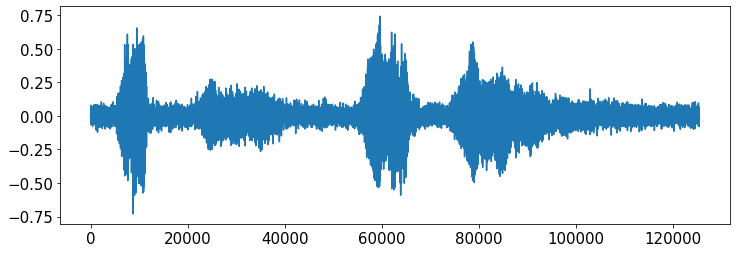

In [ ]:
wav_filtered = reduce_sound_wave_noise(b,a,noisy_wav)
#plotting the recovered Function
plt.plot(wav_filtered)

plt.subplots_adjust(hspace=.5)
plt.rc('font', size=15)
fig = plt.gcf()
fig.set_size_inches(12, 4)

**Listen To the recovered Audio With Less Noise**

In [ ]:
print("Listen to the noise reducted Audio")
Audio(wav_filtered, rate=Fs)

Listen to the noise reducted Audio


# **So In Conclusion The Results:**

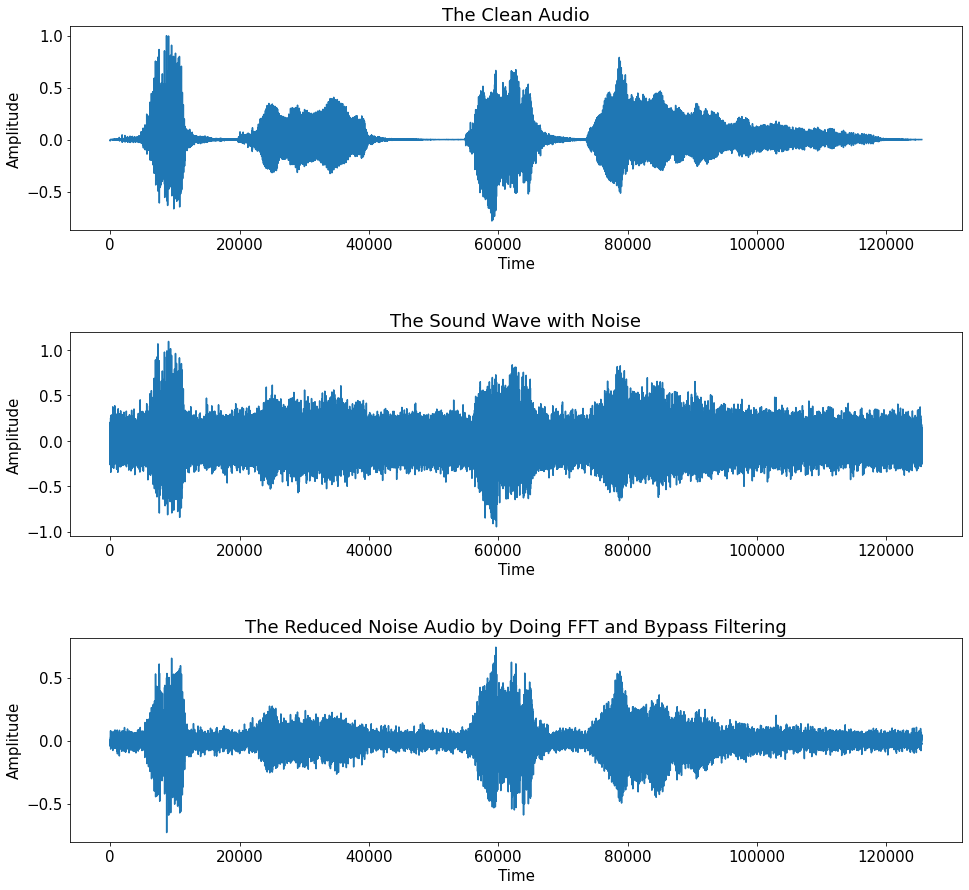

In [ ]:
plt.subplot(3,1,1)
plt.title("The Clean Audio")
plt.plot(wav)
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(3,1,2)
plt.title("The Sound Wave with Noise")
plt.plot(noisy_wav)
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(3,1,3)
plt.title("The Reduced Noise Audio by Doing FFT and Bypass Filtering")
plt.plot(wav_filtered)
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplots_adjust(hspace=.5)
plt.rc('font', size=15)
fig = plt.gcf()
fig.set_size_inches(16, 15)

In [227]:
print("1. Listen the Clean Audio from Here")
Audio("HB.wav")




1. Listen the Clean Audio from Here


In [225]:
print("2. Listen the Noisy Audio from Here")
Audio(noisy_wav, rate=Fs)

2. Listen the Noisy Audio from Here


In [226]:
print("3. Finally Listen to the noise reducted Audio")
Audio(wav_filtered, rate=Fs)

3. Finally Listen to the noise reducted Audio
